Made by: Maria Arroyo Álvarez, Rodrigo Bonferroni & Pol Lizaran Campano

# **PREDICTING HOUSE PRICES BY REGRESSION AND CLASSIFICATION METHODS**

### Libraries to import

In [259]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import warnings

### Data importation

In [260]:
Houses_tr = pd.read_csv('Processed_tr.csv', header = 0, sep = ',', delimiter = None)
Houses_te = pd.read_csv('Processed_te.csv', header = 0, sep = ',', delimiter = None)

In [263]:
Houses_tr.head(10) # Checking

,attribute_0,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15,age
0,1,6414100192,13.195614,3,2.25,5.475462,6.511454,2.0,0,0,...,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,644.096776,24
1,3,2487200875,13.311329,4,3.00,5.204501,6.140994,1.0,0,0,...,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,470.460995,50
2,4,1954400510,13.142166,3,2.00,5.050350,6.620948,1.0,0,0,...,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,632.948412,28
3,5,7237550310,14.018451,4,4.50,6.221652,9.155843,1.0,0,0,...,361.392826,142.141651,2001,0,98053,47.6561,-122.005,442.218470,13.285135,14
4,6,1321400060,12.458775,3,2.25,5.070969,6.451269,2.0,0,0,...,159.328714,0.000000,1995,0,98003,47.3097,-122.327,207.917004,587.240116,20
5,7,2008000270,12.583995,3,1.50,4.589825,6.804816,1.0,0,0,...,98.477222,0.000000,1963,0,98198,47.4095,-122.315,153.290016,790.233258,52
6,8,2414600126,12.343658,3,1.00,5.108170,6.542451,1.0,0,0,...,97.548192,67.819219,1960,0,98146,47.5123,-122.337,165.367411,680.607671,55
7,9,3793500160,12.685408,3,2.50,5.168133,6.412547,2.0,0,0,...,175.586746,0.000000,2003,0,98038,47.3684,-122.031,222.038266,638.522594,12
8,10,1736800520,13.403776,3,2.50,5.801317,6.813531,1.0,0,0,...,172.799654,157.935168,1965,0,98007,47.6007,-122.145,205.315718,741.366259,50
9,12,114101516,12.644328,3,1.00,4.889231,7.522326,1.5,0,0,...,132.851347,0.000000,1927,0,98028,47.7558,-122.229,165.367411,120.588146,88


### Scaling of numeric features

In [264]:
# We will only scale the numeric features of the dataset

numeric_features = ['price', 'sqm_living', 'sqm_lot', 'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15']

mean_numeric_tr = np.mean(Houses_tr[numeric_features])
std_numeric_tr = np.std(Houses_tr[numeric_features])

# Scale both sets with the values from training set

for i in range(len(numeric_features)):
  Houses_tr[numeric_features[i]] = (Houses_tr[numeric_features[i]] - mean_numeric_tr[numeric_features[i]])/std_numeric_tr[numeric_features[i]]
  Houses_te[numeric_features[i]] = (Houses_te[numeric_features[i]] - mean_numeric_tr[numeric_features[i]])/std_numeric_tr[numeric_features[i]]

In [265]:
Houses_tr.head(10) # Checking

,attribute_0,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15,age
0,1,6414100192,0.294951,3,2.25,0.729038,-0.105476,2.0,0,0,...,0.492738,0.258701,1951,1991,98125,47.7210,-122.319,-0.430344,0.839681,24
1,3,2487200875,0.517995,4,3.00,0.084098,-0.519883,1.0,0,0,...,-0.908790,1.429587,1965,0,98136,47.5208,-122.393,-0.917386,0.066779,50
2,4,1954400510,0.191929,3,2.00,-0.282810,0.017008,1.0,0,0,...,-0.120431,-0.659640,1987,0,98074,47.6168,-122.045,-0.267997,0.790056,28
3,5,7237550310,1.880986,4,4.50,2.505113,2.852617,1.0,0,0,...,2.645084,2.853016,2001,0,98053,47.6561,-122.005,4.100613,-1.968239,14
4,6,1321400060,-1.125320,3,2.25,-0.233732,-0.172800,2.0,0,0,...,-0.076633,-0.659640,1995,0,98003,47.3097,-122.327,0.378439,0.586596,20
5,7,2008000270,-0.883955,3,1.50,-1.378948,0.222687,1.0,0,0,...,-0.896276,-0.659640,1963,0,98198,47.4095,-122.315,-0.489380,1.490175,52
6,8,2414600126,-1.347209,3,1.00,-0.145189,-0.070801,1.0,0,0,...,-0.908790,1.016333,1960,0,98146,47.5123,-122.337,-0.297515,1.002201,55
7,9,3793500160,-0.688481,3,2.50,-0.002464,-0.216116,2.0,0,0,...,0.142356,-0.659640,2003,0,98038,47.3684,-122.031,0.602773,0.814869,12
8,10,1736800520,0.696187,3,2.50,1.504634,0.232436,1.0,0,0,...,0.104815,3.243311,1965,0,98007,47.6007,-122.145,0.337114,1.272655,50
9,12,114101516,-0.767663,3,1.00,-0.666305,1.025316,1.5,0,0,...,-0.433272,-0.659640,1927,0,98028,47.7558,-122.229,-0.297515,-1.490603,88


# Modelling

In [266]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

# we define the cross-validation method to evaluate our models

CV = RepeatedKFold(n_splits=10, n_repeats=1, random_state=12345)

## **Regression**


In [267]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We separate the dataset into X and Y, however we do so in two different ways since the VIF computation must include the intercept.

X_tr_reg = Houses_tr.loc[:,~Houses_tr.columns.isin(['attribute_0', 'id','price'])]
y_tr_reg = Houses_tr[['price']]
X_te_reg = Houses_te.loc[:,~Houses_te.columns.isin(['attribute_0', 'id','price'])]
y_te_reg = Houses_te[['price']]

y_vif, X_vif = dmatrices('price ~ bedrooms + bathrooms + sqm_living + sqm_lot + floors + waterfront + \
                view + condition + grade + sqm_above + sqm_basement + yr_built + yr_renovated + zipcode + \
                long + lat + sqm_living15 + sqm_lot15 + age', data=Houses_tr, return_type='dataframe')


# Calculate VIF for each variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['variable'] = X_vif.columns
vif

,VIF,variable
0,4.859342e+06,Intercept
1,1.844370e+00,bedrooms
2,3.322566e+00,bathrooms
3,1.577772e+01,sqm_living
4,1.781355e+00,sqm_lot
5,2.433458e+00,floors
6,1.204161e+00,waterfront
7,1.436912e+00,view
8,1.262750e+00,condition
9,3.365912e+00,grade


### 🟩 GLM

In [304]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula = "price ~ bedrooms + bathrooms + sqm_living + sqm_lot + floors + waterfront + \
                view + condition + grade + sqm_above + sqm_basement + yr_built + yr_renovated + zipcode + \
                long + lat + sqm_living15 + sqm_lot15 + age", data = Houses_tr, family = sm.families.Gaussian())

model_glm = model.fit()

# We now observe the different coefficients for each feature

print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                16658
Model:                            GLM   Df Residuals:                    16638
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                         0.23123
Method:                          IRLS   Log-Likelihood:                -11430.
Date:                Sun, 12 Jun 2022   Deviance:                       3847.1
Time:                        01:18:45   Pearson chi2:                 3.85e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -24.9831      8.213     -3.042   

In [305]:
from sklearn.metrics import mean_squared_error, r2_score

# We now obtain the training RMSE and R-squared for the training dataset

y_tr_pred = model_glm.predict(X_tr_reg)

rmse_tr = np.sqrt(mean_squared_error(y_tr_reg, y_tr_pred))
r2_tr = r2_score(y_tr_reg, y_tr_pred)

print("Training Scores")
print("RMSE: ", round(rmse_tr, 4))
print("R-squared: ", round(r2_tr, 4))

Training Scores
RMSE:  0.4806
R-squared:  0.7691


### 🟩 LASSO

In [270]:
from sklearn.linear_model import LassoCV

warnings.filterwarnings("ignore") 

# We define our model and calculate its validation score
model_lasso = LassoCV(alphas = np.arange(0, 10, 0.01), cv = CV, n_jobs = -1)
r2_mean_lasso = np.mean(cross_val_score(model_lasso, X_tr_reg, y_tr_reg.values.ravel(), cv = CV))
print("Validation score for Lasso:", round(r2_mean_lasso, 4))

Validation score for Lasso: 0.7682


In [271]:
# We fit and obtain the parameters for the best LASSO model

model_lasso.fit(X_tr_reg, y_tr_reg)

# These are the assigned coefficients for each feature and the alpha used in the model

print(model_lasso.coef_)
print("Lambda of Lasso Model:", model_lasso.alpha_)

[-4.09093546e-02  1.13583997e-01  1.98831646e-01 -4.08380986e-02
  9.66036837e-02  7.37686971e-01  1.22426679e-01  1.16891706e-01
  2.92453418e-01  9.86284210e-02  4.63920296e-02 -6.58535942e-03
  7.52991657e-05 -1.22809727e-03  2.64287886e+00 -2.43685936e-01
  1.25370179e-01 -3.91259139e-02  3.29141740e-04]
Lambda of Lasso Model: 0.0


### 🟩 Ridge



In [272]:
from sklearn.linear_model import RidgeCV

# We define our model and calculate its validation score

model_ridge = RidgeCV(alphas = np.arange(0, 10, 0.1), cv = CV)
r2_mean_ridge = np.mean(cross_val_score(model_ridge, X_tr_reg, y_tr_reg.values.ravel(), cv = CV))

print("Validation score for Ridge:", round(r2_mean_ridge, 4))

Validation score for Ridge: 0.7682


In [273]:
# We fit and obtain the parameters for the best ridge model

model_ridge.fit(X_tr_reg, y_tr_reg)

# These are the assigned coefficients for each feature and the alpha used in the model

print(model_ridge.coef_)
print("Lambda of Ridge Model:", model_ridge.alpha_)

[[-4.09219900e-02  1.13597541e-01  1.98810476e-01 -4.08825928e-02
   9.66229768e-02  7.36233014e-01  1.22457417e-01  1.16867165e-01
   2.92514212e-01  9.86233320e-02  4.64222916e-02 -6.58503063e-03
   7.53743929e-05 -1.22651890e-03  2.64087136e+00 -2.43238429e-01
   1.25387778e-01 -3.91432475e-02  3.32216953e-04]]
Lambda of Ridge Model: 0.2


### 🟩 Polynomial Regression

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# We create separate models with different degree values to compare them between one another

poly_features_2 = PolynomialFeatures(degree = 2, include_bias = False)
X_tr_poly_2 = poly_features_2.fit_transform(X_tr_reg)

poly_features_3 = PolynomialFeatures(degree = 3, include_bias = False)
X_tr_poly_3 = poly_features_3.fit_transform(X_tr_reg)

# We obtain the validation score and fit the models to our data

model_poly_2 = LinearRegression()
r2_mean_poly_2 = np.mean(cross_val_score(model_poly_2, X_tr_poly_2, y_tr_reg.values.ravel(), cv = CV))
model_poly_2.fit(X_tr_poly_2, y_tr_reg)

model_poly_3 = LinearRegression()
r2_mean_poly_3 = np.mean(cross_val_score(model_poly_3, X_tr_poly_3, y_tr_reg.values.ravel(), cv = CV))
model_poly_3.fit(X_tr_poly_3, y_tr_reg)

LinearRegression()

In [275]:
print("Validation score for Polynomial regression with degree 2:", round(r2_mean_poly_2, 4))
print("Validation score for Polynomial regression with degree 3:", round(r2_mean_poly_3, 4))

Validation score for Polynomial regression with degree 2: 0.825
Validation score for Polynomial regression with degree 3: 0.0308


### 🟩 Gradient Boosting Regressor

In [276]:
from sklearn.ensemble import HistGradientBoostingRegressor

# These are the parameters we will evaluate

lr_list_gb = [0.05, 0.1, 0.3]
depth_gb = [5, 7, 10]
maximum_bins = [200, 255]

scores_gb_reg = []

for l_rate in lr_list_gb:
  for total_depth in depth_gb:
    for m_bins in maximum_bins:
      regr_GBR = cross_val_score(HistGradientBoostingRegressor(learning_rate = l_rate, max_bins = m_bins,
                                 max_depth = total_depth, random_state = 12345), X_tr_reg, y_tr_reg.values.ravel(), cv = CV)
      scores_gb_reg.append({'lr_list': l_rate, 'depth_gb': total_depth, 'm_bins': m_bins,  'score': np.mean(regr_GBR)})

In [277]:
best_gb_reg = -np.inf
settings_gb_reg, total_mean_gb_reg = [], []
mean_tr_acc_gb_reg = None

# We keep the settings corresponding to the best combination evaluated

for i in scores_gb_reg:
  total_mean_gb_reg.append(i['score'])
  if i['score'] > best_gb_reg:
    best_gb_reg = i['score']
    settings_gb_reg = ['lr_list: ', i['lr_list'], 'depth_gb: ', i['depth_gb'], 'm_bins: ', i['m_bins'],
                       'score:', i['score']]
  
print("Best settings configuration: ", settings_gb_reg[:-2])
print("Best validation score: ", round(best_gb_reg, 4))
print("General Score mean Gradient Boosting Regressor: ", round(np.mean(total_mean_gb_reg), 4))

Best settings configuration:  ['lr_list: ', 0.1, 'depth_gb: ', 10, 'm_bins: ', 255]
Best validation score:  0.8976
General Score mean Gradient Boosting Regressor:  0.8919


## **Classification**

In [278]:
# We classify the houses into cheap and expensive.
from copy import copy

Houses_tr_classif = copy(Houses_tr)
Houses_te_classif = copy(Houses_te)

median_prices_tr = np.median(Houses_tr['price'])

Houses_tr_classif['price'] = [0 if x < median_prices_tr else 1 for x in Houses_tr_classif['price']]
Houses_te_classif['price'] = [0 if x < median_prices_tr else 1 for x in Houses_te_classif['price']]

Notice that the threshold has been made according to training values for both sets, considering cheap (0) houses those having a price lower than the median value, and expensive (1) the remaining. 

In [279]:
Houses_tr_classif.head(20) # Cheking

,attribute_0,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15,age
0,1,6414100192,1,3,2.25,0.729038,-0.105476,2.0,0,0,...,0.492738,0.258701,1951,1991,98125,47.7210,-122.319,-0.430344,0.839681,24
1,3,2487200875,1,4,3.00,0.084098,-0.519883,1.0,0,0,...,-0.908790,1.429587,1965,0,98136,47.5208,-122.393,-0.917386,0.066779,50
2,4,1954400510,1,3,2.00,-0.282810,0.017008,1.0,0,0,...,-0.120431,-0.659640,1987,0,98074,47.6168,-122.045,-0.267997,0.790056,28
3,5,7237550310,1,4,4.50,2.505113,2.852617,1.0,0,0,...,2.645084,2.853016,2001,0,98053,47.6561,-122.005,4.100613,-1.968239,14
4,6,1321400060,0,3,2.25,-0.233732,-0.172800,2.0,0,0,...,-0.076633,-0.659640,1995,0,98003,47.3097,-122.327,0.378439,0.586596,20
5,7,2008000270,0,3,1.50,-1.378948,0.222687,1.0,0,0,...,-0.896276,-0.659640,1963,0,98198,47.4095,-122.315,-0.489380,1.490175,52
6,8,2414600126,0,3,1.00,-0.145189,-0.070801,1.0,0,0,...,-0.908790,1.016333,1960,0,98146,47.5123,-122.337,-0.297515,1.002201,55
7,9,3793500160,0,3,2.50,-0.002464,-0.216116,2.0,0,0,...,0.142356,-0.659640,2003,0,98038,47.3684,-122.031,0.602773,0.814869,12
8,10,1736800520,1,3,2.50,1.504634,0.232436,1.0,0,0,...,0.104815,3.243311,1965,0,98007,47.6007,-122.145,0.337114,1.272655,50
9,12,114101516,0,3,1.00,-0.666305,1.025316,1.5,0,0,...,-0.433272,-0.659640,1927,0,98028,47.7558,-122.229,-0.297515,-1.490603,88


### Selection of features to model


In [280]:
# We separate the dataset into explanatory variables and the expected result.

X_tr_class = Houses_tr_classif.loc[:,~Houses_tr_classif.columns.isin(['price', 'id', 'attribute_0'])]
y_tr_class = Houses_tr_classif['price'] # Feature we want to predict
X_te_class = Houses_te_classif.loc[:,~Houses_te_classif.columns.isin(['price', 'id', 'attribute_0'])]
y_te_class = Houses_te_classif['price'] # Feature we want to predict

## LINEAR METHODS


### 🟪 Logistic Regression

In [281]:
from sklearn.linear_model import LogisticRegression

# We define our model and calculate its validation score

classif_LR = LogisticRegression(random_state = 12345, solver = 'sag', multi_class = 'ovr')
acc_mean_LR = np.mean(cross_val_score(classif_LR, X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy'))

print("Validation score of Logistic Regression for training set:", round(acc_mean_LR, 4))

Validation score of Logistic Regression for training set: 0.565


### 🟪 LDA

In [282]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# We define our model and calculate its validation score

classif_LDA = LinearDiscriminantAnalysis()
acc_mean_LDA = np.mean(cross_val_score(classif_LDA, X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy'))

print("Validation score of LDA for training set:", round(acc_mean_LDA, 4))

Validation score of LDA for training set: 0.8371


### 🟪 Naive Bayes


In [283]:
from sklearn.naive_bayes import GaussianNB

# We define our model and calculate its validation score

classif_GNB = GaussianNB()
acc_mean_GNB = np.mean(cross_val_score(classif_GNB, X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy'))

print("Validation score of Naive Bayes for training set:", round(acc_mean_GNB, 4))

Validation score of Naive Bayes for training set: 0.757


### 🟪 SVM

In [284]:
from sklearn.svm import LinearSVC

# We define our model and calculate its validation score

classif_SVM = LinearSVC(dual = False, tol = 1e-6)
acc_mean_SVM = np.mean(cross_val_score(classif_SVM, X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy'))

print("Validation score of kernelized SVM for training set:", round(acc_mean_SVM, 4))

Validation score of kernelized SVM for training set: 0.8407


## NON LINEAR METHODS

### 🟨 QDA

In [285]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# We define our model and calculate its validation score

classif_QDA = QuadraticDiscriminantAnalysis()
acc_mean_QDA = np.mean(cross_val_score(classif_QDA, X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy'))

print("Validation score of QDA for training set:", round(acc_mean_QDA, 4))

Validation score of QDA for training set: 0.7446


### 🟨 Decision tree

In [286]:
from sklearn import tree

# We define our model and calculate its validation score

classif_DTC = tree.DecisionTreeClassifier()
acc_mean_DTC = np.mean(cross_val_score(classif_DTC, X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy'))

print("Validation score of Decision Tree for training set:", round(acc_mean_DTC, 4))

Validation score of Decision Tree for training set: 0.8705


### 🟨 Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier

# These are the parameters we will evaluate

n_estim_tr = [80, 130, 180]
m_depth_tr = [7, 10]
m_features_tr = [0.4, 0.6]
m_samples_tr = [0.25, 0.55]

scores_tr = []

for estimator in n_estim_tr:
  for num_depth in m_depth_tr:
    for num_features in m_features_tr:
      for num_samples in m_samples_tr:
          classif_RFC = cross_val_score(RandomForestClassifier(n_estimators = estimator, max_depth = num_depth,
                                        max_features = num_features, max_samples = num_samples, random_state = 12345), 
                                        X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy')
          scores_tr.append({'n_estim': estimator, 'm_depth': num_depth, 'm_features': num_features, 'm_samples':num_samples, 
                            'score': np.mean(classif_RFC)}) # np.mean(classif_RFC) = Mean of validation set of CV

In [288]:
# Obtaining information about Random Forest

best_rf = -np.inf
settings_rf, total_mean_rf = [], []

for i in scores_tr:
  total_mean_rf.append(i['score'].mean())
  if i['score'].mean() > best_rf:
    best_rf = i['score'].mean()
    settings_rf = ['n_estim: ', i['n_estim'], 'm_depth: ', i['m_depth'], 'm_features:', i['m_features'], 'm_samples:', i['m_samples']]
  
print("Best settings configuration: ", settings_rf)
print("Best score: ", round(best_rf, 4))
print("General Score mean Random Forest: ", round(np.mean(total_mean_rf), 4))

Best settings configuration:  ['n_estim: ', 80, 'm_depth: ', 10, 'm_features:', 0.6, 'm_samples:', 0.55]
Best score:  0.9088
General Score mean Random Forest:  0.9038


### 🟨 Gradient Boosting Classifier


In [289]:
from sklearn.ensemble import GradientBoostingClassifier

# These are the parameters we will evaluate

lr_list_gb = [0.01, 0.1]
estim_gb = [80, 130, 180]
depth_gb = [7, 10]
m_features_gb = [0.4, 0.6]

scores_gb = []

for learning_rate in lr_list_gb:
  for estimator in estim_gb:
    for num_features in m_features_gb:
      for total_depth in depth_gb:
        classif_GBC = cross_val_score(GradientBoostingClassifier(n_estimators=estimator, learning_rate=learning_rate, 
                                      max_features=num_features, max_depth=total_depth, random_state = 12345),
                                      X_tr_class, y_tr_class, cv = CV, scoring = 'accuracy')
        scores_gb.append({'lr_list': learning_rate, 'estim': estimator, 'm_features_gb': num_features, 
                          'depth': total_depth, 'score': np.mean(classif_GBC)})

In [290]:
best_gb = -np.inf
settings_gb, total_mean_gb = [], []
mean_tr_acc_gb = None

# We keep the settings corresponding to the best combination evaluated

for i in scores_gb:
  total_mean_gb.append(i['score'])
  if i['score'] > best_gb:
    best_gb = i['score']
    settings_gb = ['lr_list: ', i['lr_list'], 'estim: ', i['estim'], 'm_features_gb: ', i['m_features_gb'],
                   'depth:', i['depth'], 'score:', i['score']]
  
print("Best settings configuration: ", settings_gb[:-2])
print("Best validation score: ", round(best_gb, 4))
print("General Score mean Gradient Boosting: ", round(np.mean(total_mean_gb), 4))

Best settings configuration:  ['lr_list: ', 0.1, 'estim: ', 80, 'm_features_gb: ', 0.4, 'depth:', 7]
Best validation score:  0.9114
General Score mean Gradient Boosting:  0.9081


# **Testing**

### Best regression model

The best regression model was chosen to be the Gradient Boosting Regressor.

In [291]:
# We fit a Gradient Boosting method with the best calculated parameters to our data

best_GBR = HistGradientBoostingRegressor(learning_rate = 0.1, max_depth = 10, max_bins = 255, random_state = 12345)
best_GBR.fit(X_tr_reg, np.ravel(y_tr_reg))

print("Test score best set parameters of Gradient Boosting Regressor:", round(best_GBR.score(X_te_reg,y_te_reg), 4))

Test score best set parameters of Gradient Boosting Regressor: 0.9


### Best classification models

The best classification models were chosen to be LDA and Gradient Boosting Classifier.

In [292]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [293]:
LDA_fitted = LinearDiscriminantAnalysis().fit(X_tr_class,y_tr_class)

print("Test score LDA:", round(LDA_fitted.score(X_te_class,y_te_class), 4))

Test score LDA: 0.8477


Text(0.5, 1.0, 'Confusion Matrix of LDA \n')

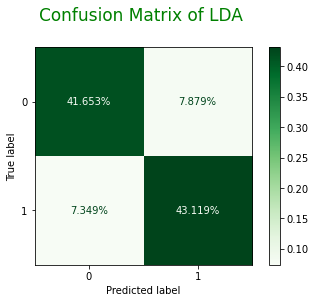

In [294]:
predictions_lda = LDA_fitted.predict(X_te_class)
conf_matr_lda = confusion_matrix(y_te_class, predictions_lda, labels = LDA_fitted.classes_, normalize = 'all')

disp_lda = ConfusionMatrixDisplay(confusion_matrix = conf_matr_lda,
                                  display_labels = LDA_fitted.classes_)
disp_lda.plot(cmap = 'Greens',  values_format = '.3%')
plt.title("Confusion Matrix of LDA \n", fontsize = 17, color = "green")

In [295]:
best_RFC = RandomForestClassifier(n_estimators = 80, max_depth = 10, max_features = 0.6,
                                  max_samples = 0.55, random_state = 12345).fit(X_tr_class, y_tr_class)

print("Test score best set parameters of Random Forest:", round(best_RFC.score(X_te_class,y_te_class), 4))

Test score best set parameters of Random Forest: 0.9182


Text(0.5, 1.0, 'Confusion Matrix of \n Random Forest \n')

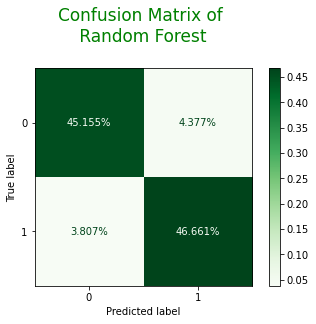

In [296]:
predictions_rfc = best_RFC.predict(X_te_class)
conf_matr_rfc = confusion_matrix(y_te_class, predictions_rfc, labels = best_RFC.classes_, normalize = 'all')

disp_rfc = ConfusionMatrixDisplay(confusion_matrix = conf_matr_rfc,
                                  display_labels = best_RFC.classes_)
disp_rfc.plot(cmap = 'Greens',  values_format = '.3%')
plt.title("Confusion Matrix of \n Random Forest \n", fontsize = 17, color = "green")

In [297]:
best_GBC = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 80, max_features = 0.4, max_depth = 7,
                                      random_state = 12345).fit(X_tr_class, y_tr_class)

print("Test score best set parameters of Gradient Boosting Classifier:", round(best_GBC.score(X_te_class,y_te_class), 4))

Test score best set parameters of Gradient Boosting Classifier: 0.9224


Text(0.5, 1.0, 'Confusion Matrix of \n Gradient Boosting Classifier \n')

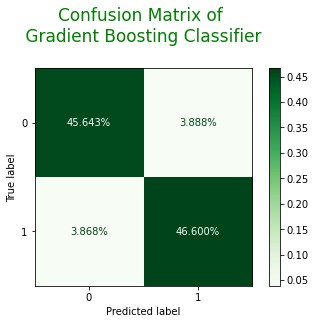

In [298]:
predictions_gbc = best_GBC.predict(X_te_class)
conf_matr_gbc = confusion_matrix(y_te_class, predictions_gbc, labels = best_GBC.classes_, normalize = 'all')

disp_gbc = ConfusionMatrixDisplay(confusion_matrix = conf_matr_gbc,
                                  display_labels = best_GBC.classes_)
disp_gbc.plot(cmap = 'Greens', values_format = '.3%')
plt.title("Confusion Matrix of \n Gradient Boosting Classifier \n", fontsize = 17, color = "green")

## **Personal predictions**

### Data definition

In [299]:
from pandas.core.frame import DataFrame

# As we don't own a house in Seattle we will situate the data in the most expensive area and the cheapest one in order to see how this would affect our price

pol_data_WC = {'bedrooms':[3], 'bathrooms':[2], 'sqm_living':[np.log(105)], 'sqm_lot':[np.log(230)], 'floors':[1], 'waterfront':[0], 'view':[3], 
               'condition':[3], 'grade':[8], 'sqm_above':[np.log(105)], 'sqm_basement':[17], 'yr_built':[2005], 'yr_renovated':[0], 'zipcode':[98102], 
               'lat':[47.6298], 'long':[-122.323], 'sqm_living15':[np.log(105)], 'sqm_lot15':[np.log(200)], 'age':[10]}
pol_data_BC = {'bedrooms':[3], 'bathrooms':[2], 'sqm_living':[np.log(105)], 'sqm_lot':[np.log(230)], 'floors':[1], 'waterfront':[0], 'view':[3], 
               'condition':[3], 'grade':[8], 'sqm_above':[np.log(105)], 'sqm_basement':[17], 'yr_built':[2005], 'yr_renovated':[0], 'zipcode':[98168], 
               'lat':[47.4739], 'long':[-122.280], 'sqm_living15':[np.log(105)], 'sqm_lot15':[np.log(200)], 'age':[10]}

pol_data_WC_df = DataFrame(pol_data_WC)
pol_data_BC_df = DataFrame(pol_data_BC)

### Prediction with Regresssion methods

In order to predict, the changes made on the 'price' variable need to be reverted. 

In [300]:
pred_WC = best_GBR.predict(pol_data_WC_df)
pred_BC = best_GBR.predict(pol_data_BC_df)
real_pred_WC = np.exp(pred_WC*std_numeric_tr["price"] + mean_numeric_tr["price"])
real_pred_BC = np.exp(pred_BC*std_numeric_tr["price"] + mean_numeric_tr["price"]) 

print("Prediction for the house located in the well-off area with Gradient Boosting Regressor: ", math.ceil(real_pred_WC[0]), "$", sep = "")
print("Prediction for the house located in the bad-off area with Gradient Boosting Regressor: ", math.floor(real_pred_BC[0]), "$", sep = "")

Prediction for the house located in the well-off area with Gradient Boosting Regressor: 1623806$
Prediction for the house located in the bad-off area with Gradient Boosting Regressor: 843650$


### Prediction with classification methods

#### LDA

In [301]:
print("Prediction for the house located in the well-off area with LDA: ", LDA_fitted.predict(pol_data_WC_df)[0])
print("Prediction for the house located in the bad-off area with LDA: ", LDA_fitted.predict(pol_data_BC_df)[0])

Prediction for the house located in the well-off area with LDA:  0
Prediction for the house located in the bad-off area with LDA:  0


#### Gradient Boosting Classifier

In [302]:
print("Prediction for the house located in the well-off area with Gradient Boosting Classifier: ", best_GBC.predict(pol_data_WC_df)[0])
print("Prediction for the house located in the bad-off area with Gradient Boosting Classifier: ", best_GBC.predict(pol_data_BC_df)[0])

Prediction for the house located in the well-off area with Gradient Boosting Classifier:  1
Prediction for the house located in the bad-off area with Gradient Boosting Classifier:  1


#### Random Forest

In [303]:
print("Prediction for the house located in the well-off area with Random Forest: ", best_RFC.predict(pol_data_WC_df)[0])
print("Prediction for the house located in the bad-off area with Random Forest: ", best_RFC.predict(pol_data_BC_df)[0])

Prediction for the house located in the well-off area with Random Forest:  1
Prediction for the house located in the bad-off area with Random Forest:  1
